INAUGURAL PROJECT 
AUTHOR: LNP953

Importing and setting magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

#Importing Household Specialization Model
#import household as model
from inauguralproject import HouseholdSpecializationModelClass

#creating a new class
model = HouseholdSpecializationModelClass()


Question 1: 

Illustrating the hour-ratio between home production for the female and the male when varying alpha and sigma.

In [2]:
#Creating a table
#Table 1 is inspired by the table made in PS1 excercise 2. 
def table():
    """this function defines a table that plots the values of HF/HM
    for the specified values of alpha and sigma"""
    
    # Empty text
    text = ''
    
    text += f'{"alpha/sigma":<7s}{"":1s}'

    # Top header
    for sigma in np.linspace(0.5,1.5,3):
       model.par.sigma=sigma
       text += f'{sigma:8.2f}' #setting the column values equal to sigma
    text += '\n' + '-'*40 + '\n' #horisontal seperator 
    
    # Body
    for i,alpha in enumerate(np.linspace(0.25,0.75,3)):
        model.par.alpha=alpha 
        if i > 0: 
            text += '\n'
        text += f'{alpha:10.2f} |'  #setting the row values equal to alpha
        for sigma in np.linspace(0.5,1.5,3): 
            model.par.sigma=sigma
            opt = model.solve_discrete()
            HF_HM = opt.HF/opt.HM

            #plotting values
            text += f'{HF_HM:8.2f}'  
    
    #Resetting the values for alpha and sigma:
    model.par.alpha = 0.5
    model.par.sigma = 1.0
    
    #Printing
    print(f"Table 1: values of hF/hM when varying alpha and sigma:\n{text}")

table()

/Users/jasminsafai/Desktop/IntoProg/projects-2023-lnp953/inauguralproject/household.py:70: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/jasminsafai/Desktop/IntoProg/projects-2023-lnp953/inauguralproject/household.py:70: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/jasminsafai/Desktop/IntoProg/projects-2023-lnp953/inauguralproject/household.py:74: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


Table 1: values of hF/hM when varying alpha and sigma:
alpha/sigma     0.50    1.00    1.50
----------------------------------------
      0.25 |    0.55    0.31    0.21
      0.50 |    1.00    1.00    1.00
      0.75 |    1.83    3.25    4.67


Question 2:

Plotting the logarithmic hour-ratio between home production for the female and the male, log(hF/hM), against the logarithmic wage-ratio in the market for the female and the male, log(wF/wM), for different values of wF.

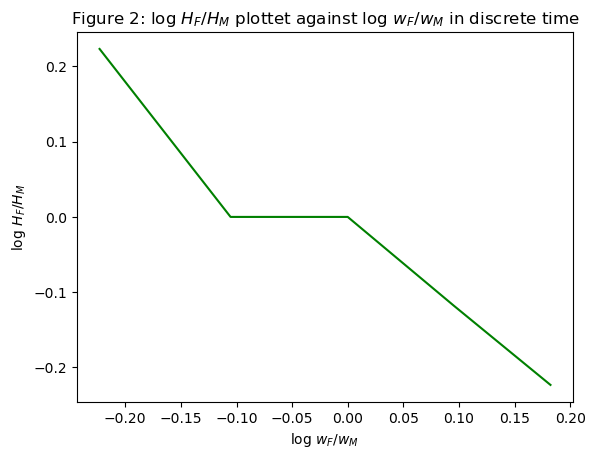

In [3]:
#Creating empty lists for the log hour-ratio and log wage-ratio in DISCRETE time
log_HF_HM_d = []
log_wF_wM_d = []

# d) Looping over wF values
for wF in [0.8, 0.9, 1.0, 1.1, 1.2]:
    #Setting wF value equal to current value in loop
    model.par.wF = wF

    #Solving the model in discrete time:
    #Storing solution in opt
    opt = model.solve_discrete() 

    #Calculating log(HF/HM) and log(wF/wM)
    log_HF_HM = np.log(opt.HF/opt.HM) 
    log_wF_wM = np.log(wF/model.par.wM)

    #Storing values in the empty lists
    log_HF_HM_d.append(log_HF_HM) 
    log_wF_wM_d.append(log_wF_wM)

# e)Plotting
plt.plot(log_wF_wM_d, log_HF_HM_d, linestyle='-', color='Green') 
plt.xlabel('log $w_F/w_M$') 
plt.ylabel('log $H_F/H_M$') 
plt.title('Figure 2: log $H_F/H_M$ plottet against log $w_F/w_M$ in discrete time') 
plt.show() 

Question 3:

Now plotting log(hF/hM) against log(wF/wM) in continous time for different values of wF.

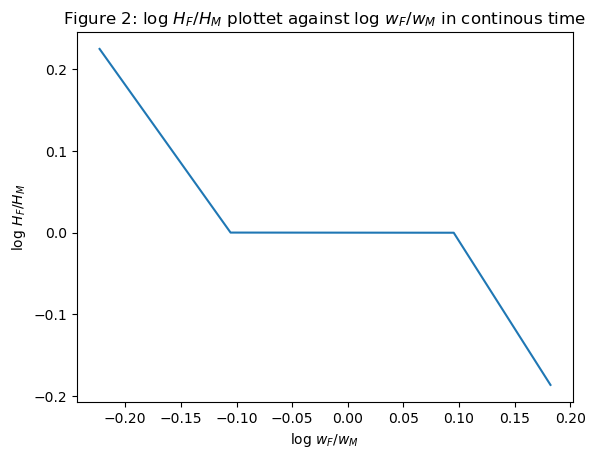

In [4]:
#Creating empty lists for the log hour-ratio and log wage-ratio in CONTINOUS time
log_HF_HM_c = np.empty(5)
log_wF_wM_c = np.empty(5)

#Solving the model in continous time:
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve()
    
    #Saving the results in the empty lists from above
    log_HF_HM_c[i] = np.log(opt.HF/opt.HM)
    log_wF_wM_c[i] = np.log(model.par.wF/model.par.wM)
        
#Plotting figure 2
figure_two = plt.figure()
ax = figure_two.add_subplot(1,1,1)
ax.plot(log_wF_wM_c, log_HF_HM_c)
ax.set_title('Figure 2: log $H_F/H_M$ plottet against log $w_F/w_M$ in continous time')
ax.set_xlabel('log $w_F/w_M$')
ax.set_ylabel('log $H_F/H_M$')
plt.show()

Question 4 :

Choosing alpha and sigma that minimizes the function.

In [5]:
from scipy import optimize

def obj_func(par):
    alpha, sigma = par

    #Setting alpha equal to the current value in the loop
    model.par.alpha = alpha 

    #Setting sigma equal to the current value in the loop
    model.par.sigma = sigma 

    #Using the solve function for wF values and regression function
    model.solve_wF_vec() 
    model.run_regression() 

    #Calling the beta parameters 
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1

    #Calculating the function
    return ((0.4-beta0)**2 + (-0.1-beta1)**2)

#Specifying bounds for alpha and sigma
bounds = [(0, 0.999), (0, 1.99)] 

#Using an initial guess
par0 = [0.5, 1]
result = optimize.minimize(obj_func, par0, bounds=bounds,method = "Nelder-Mead")
print(f"The values of alpha and sigma that minimizes the function is: alpha = {result.x[0]:.3f} and sigma = {result.x[1]:.3f}")

x = (0.988, 0.091)
print(obj_func(x))


The values of alpha and sigma that minimizes the function is: alpha = 0.988 and sigma = 0.091
2.3850275085224866e-06


In [6]:

#Making a list of alphas and sigmas close to the optimal point found before

alphas = np.linspace(0.90,0.99,20)
sigmas = np.linspace(0.00,0.1,20)

vec = []
#Creating a loop in a loop to calclate HF/HM 
for i, alpha in enumerate(alphas):
    for j, sigma in enumerate(sigmas):
        #Setting alpha equal to the current value in the loop
        model.par.alpha = alpha 

        #Setting alpha equal to the current value in the loop
        model.par.sigma = sigma 

        #Using the solve function for the female wage values
        model.solve_wF_vec() 

        #Using the regression function
        model.run_regression() 

        #Calculating the function
        value = ((0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2)
        if value > 0:
            vec.append(value)

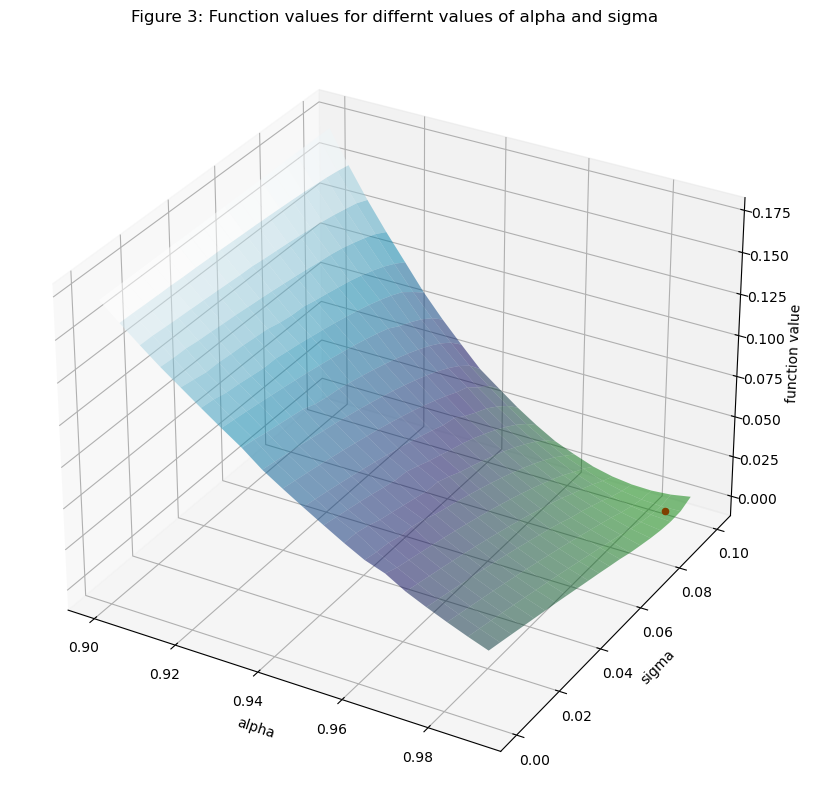

In [7]:
#Creating a 3D plot by using meshgrid 

#Changing the length of the alpha and sigma vector so it is equal to the length of "vec"
func_values = np.array(vec).reshape(len(alphas), len(sigmas)) 

#Making 2D grids of alpha and sigma values
alpha_grid, sigma_grid = np.meshgrid(alphas, sigmas)

#Creating the 3D plot
figure_three = plt.figure(figsize=(12,10)) 

#Creating the three dimensions
ax = plt.axes(projection='3d')

#Plotting
ax.plot_surface(alpha_grid, sigma_grid, func_values, cmap='ocean', alpha = 0.50) 
ax.scatter([0.988], [0.091], [(0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2], color='red') #Plotting optimal solution
ax.set_xlabel('alpha') 
ax.set_ylabel('sigma') 
ax.set_zlabel('function value') 
ax.set_title('Figure 3: Function values for differnt values of alpha and sigma') #Title
plt.show() 